## Import main libraries

In [110]:
from graphviz import Digraph
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
import matplotlib.patches as mpatches

In [106]:
def multiplyList(myList): 
      
    # Multiply elements one by one 
    result = 1
    for x in myList: 
         result = result * x  
    return result  

## Markov Chains States Simulator

In [113]:
#Create a class that isntatitates current state

class MarkovChain(object):
    def __init__(self, transition_prob):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_prob: dict
            A dict object representing the transition 
            probabilities in Markov Chain. 
            Should be of the form: 
                {'state1': {'state1': 0.1, 'state2': 0.4}, 
                 'state2': {...}}
        """
        self.transition_prob = transition_prob
        self.states = list(transition_prob.keys())

#write a method that predicts most likely next state

    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
            self.states, 
            p=[self.transition_prob[current_state][next_state] 
               for next_state in self.states]
        )

#write a method that predicts most likely customer jouurney for a defined number of actions till conversion

    def generate_states(self, user_info, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        no = user_info[2]
        
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        
        final_tups = []
        for idx, state in enumerate(future_states):
            if state == 'FB':
                tup = (state + "_Step_" + str(idx), user_info[3])
                final_tups.append(tup)
            elif state == 'Email':
                tup = (state + "_Step_" + str(idx), user_info[4])
                final_tups.append(tup)
            else:
                tup = (state + "_Step_" + str(idx), user_info[5])
                final_tups.append(tup)
#         print(final_tups)
        
        states = [item[0] for item in final_tups]
        probs = [item[1] for item in final_tups]
        steps_to_conv = len(states)
        total_prob_to_convert = round(multiplyList(probs), 2)
        
        red_patch = mpatches.Patch(color='red', label='The red data')
        blue_patch = mpatches.Patch(color='blue', label='The blue data')


        plt.bar(states, probs)
        plt.ylabel('Probability to Convert', fontsize = 24, color = '#073997')
        plt.xticks(rotation=60, fontsize = 12, color = '#073997')
        plt.title('Customer Journey to Conversion Prediction', fontsize = 24, color = '#073997')
        red_patch = mpatches.Patch(color='red', label='steps_to_conv = ' + str(steps_to_conv))
        blue_patch = mpatches.Patch(color='blue', label='total_prob_to_convert = ' + str(total_prob_to_convert))

        plt.legend(handles=[red_patch, blue_patch], fontsize = 12)
        plt.show

## Import table with conversion metrics

In [3]:
df = pd.read_csv('markov_data.csv')

In [4]:
df.head()

,td_client_id,first_name,last_name,email,avg_session_touchpoints_count,avg_path_to_conversion,FB_last_touch_conversion_rate,Email_last_touch_conversion_rate,AdWords_last_touch_conversion_rate,FB_to_FB,FB_to_Email,FB_to_AdWords,Email_to_Email,Email_to_FB,Email_to_AdWords,AdWords_to_AdWords,AdWords_to_FB,AdWords_to_Email
0,2efee386-2be5-43da-9873-ef0ecadcb8be,Audy,Schiementz,aschiementz0@psu.edu,38,4,0.60,0.49,0.71,0.38,0.73,0.12,0.52,0.58,0.73,0.86,0.37,0.83
1,a114f746-5d2e-4c76-bd76-e326cac999ec,Gavin,Calton,gcalton1@soup.io,7,83,0.47,0.44,0.43,0.38,0.38,0.94,0.82,0.56,0.49,0.79,0.86,0.39
2,0dddb580-16f3-49f6-89c4-b9d8fee7937c,Arlyne,Haylor,ahaylor2@wufoo.com,76,67,0.28,0.58,0.57,0.81,0.40,0.55,0.41,0.88,0.35,0.79,0.52,0.62
3,cac304f9-8cd4-42f3-8f70-b104196cd0dd,Kimmy,Ranvoise,kranvoise3@ustream.tv,19,54,0.56,0.73,0.54,0.45,0.84,0.22,0.70,0.51,0.65,0.11,0.32,0.20
4,76d24962-4e56-4d74-ab18-917256b6b578,Barton,Jewes,bjewes4@about.com,44,90,0.92,0.15,0.82,0.28,0.70,0.26,0.79,0.46,0.57,0.12,0.27,0.80


### Create State Transition Probability matrix / nested dictionary

In [5]:
test = df.to_dict('records')
len(test)

1000

In [6]:
test[:2]

[{'td_client_id': '2efee386-2be5-43da-9873-ef0ecadcb8be',
  'first_name': 'Audy',
  'last_name': 'Schiementz',
  'email': 'aschiementz0@psu.edu',
  'avg_session_touchpoints_count': 38,
  'avg_path_to_conversion': 4,
  'FB_last_touch_conversion_rate': 0.6,
  'Email_last_touch_conversion_rate': 0.49,
  'AdWords_last_touch_conversion_rate': 0.71,
  'FB_to_FB': 0.38,
  'FB_to_Email': 0.73,
  'FB_to_AdWords': 0.12,
  'Email_to_Email': 0.52,
  'Email_to_FB': 0.58,
  'Email_to_AdWords': 0.73,
  'AdWords_to_AdWords': 0.86,
  'AdWords_to_FB': 0.37,
  'AdWords_to_Email': 0.83},
 {'td_client_id': 'a114f746-5d2e-4c76-bd76-e326cac999ec',
  'first_name': 'Gavin',
  'last_name': 'Calton',
  'email': 'gcalton1@soup.io',
  'avg_session_touchpoints_count': 7,
  'avg_path_to_conversion': 83,
  'FB_last_touch_conversion_rate': 0.47,
  'Email_last_touch_conversion_rate': 0.44,
  'AdWords_last_touch_conversion_rate': 0.43,
  'FB_to_FB': 0.38,
  'FB_to_Email': 0.38,
  'FB_to_AdWords': 0.94,
  'Email_to_Email

In [52]:
def create_user_TM(test_list):
    listy = []
    for item in test_list:
        td_client_id = item['td_client_id']
        transition_prob = {'FB': {'FB': item['FB_to_FB'], 'Email': item['FB_to_Email'], 'AdWords' : item['FB_to_AdWords']},
                          'Email' : {'FB': item['Email_to_FB'], 'Email': item['Email_to_Email'], 'AdWords' : item['Email_to_AdWords']},
                          'AdWords' : {'FB': item['AdWords_to_FB'], 'Email': item['AdWords_to_Email'], 'AdWords' : item['AdWords_to_AdWords']}}
        avg_session_touchpoints_count = item['avg_session_touchpoints_count']
        avg_path_to_conv = item['avg_path_to_conversion']
        FB_conv_rate = item['FB_last_touch_conversion_rate']
        Email_conv_rate = item['Email_last_touch_conversion_rate']
        AdWords_conv_rate = item['AdWords_last_touch_conversion_rate']
        
        tup = (td_client_id, avg_session_touchpoints_count, avg_path_to_conv, FB_conv_rate,
               Email_conv_rate, AdWords_conv_rate, transition_prob)
        listy.append(tup)   
    return listy

In [53]:
testme = create_user_TM(test[:5])

In [97]:
testme[0]

('2efee386-2be5-43da-9873-ef0ecadcb8be',
 38,
 4,
 0.6,
 0.49,
 0.71,
 {'FB': {'FB': 0.7, 'Email': 0.2, 'AdWords': 0.1},
  'Email': {'FB': 0.2, 'Email': 0.45, 'AdWords': 0.35},
  'AdWords': {'FB': 0.25, 'Email': 0.25, 'AdWords': 0.5}})

### Function to return transition matrix by td_client_id

In [61]:
def return_single_TM(td_client_id, user_list):
    for item in user_list:
        if item[0] == td_client_id:
            TM = item[6]
    return TM

In [62]:
TM = return_single_TM('2efee386-2be5-43da-9873-ef0ecadcb8be', testme)

In [63]:
TM['FB']['FB'] = 0.70
TM['FB']['Email'] = 0.20
TM['FB']['AdWords'] = 0.1

In [64]:
TM['Email']['FB'] = 0.2
TM['Email']['Email'] = 0.45
TM['Email']['AdWords'] = 0.35

In [65]:
TM['AdWords']['FB'] = 0.25
TM['AdWords']['Email'] = 0.25
TM['AdWords']['AdWords'] = 0.5

In [66]:
TM

{'FB': {'FB': 0.7, 'Email': 0.2, 'AdWords': 0.1},
 'Email': {'FB': 0.2, 'Email': 0.45, 'AdWords': 0.35},
 'AdWords': {'FB': 0.25, 'Email': 0.25, 'AdWords': 0.5}}

In [37]:
transition_prob = {'Facebook': {'Facebook': 0.8, 'Email': 0.19, 
 'Product_Page': 0.01},
 'Email': {'Facebook': 0.2, 'Email': 0.7,
 'Product_Page': 0.1},
 'Product_Page': {'Facebook': 0.1, 'Email': 0.2,
 'Product_Page': 0.7}}

In [34]:
hm = pd.DataFrame(transition_prob)

In [35]:
hm.head()

,Facebook,Email,Product_Page
Email,0.19,0.7,0.2
Facebook,0.80,0.2,0.1
Product_Page,0.01,0.1,0.7


In [117]:
#Predict Next State from current state

weather_chain = MarkovChain(transition_prob=TM)

weather_chain.next_state(current_state='FB')

'Email'

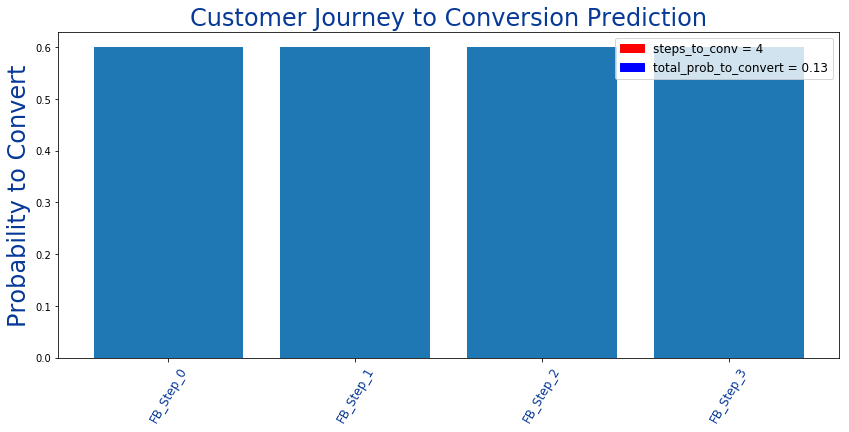

In [120]:
weather_chain.generate_states(testme[0], current_state='FB')     

In [74]:
testme[:1]

[('2efee386-2be5-43da-9873-ef0ecadcb8be',
  38,
  4,
  0.6,
  0.49,
  0.71,
  {'FB': {'FB': 0.7, 'Email': 0.2, 'AdWords': 0.1},
   'Email': {'FB': 0.2, 'Email': 0.45, 'AdWords': 0.35},
   'AdWords': {'FB': 0.25, 'Email': 0.25, 'AdWords': 0.5}})]

In [ ]:
def journey_predictor(current_state, td_client_id, user_list):
    journey = []
    
    #get specific user info
    for item in user_list:
        if item[0] == td_client_id:
            user_info = item
    
    TM = user_info[5]
    AVG_

### Same function, using probability matrix instead of nested dictionary

In [26]:
import numpy as np
 
class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [27]:
>>> transition_matrix = [[0.8, 0.19, 0.01],
                         [0.2,  0.7,  0.1],
                         [0.1,  0.2,  0.7]]
>>> weather_chain = MarkovChain(transition_matrix=transition_matrix,
                                states=['Facebook', 'Email', 'Product_page'])
>>> weather_chain.next_state(current_state='Facebook')



'Facebook'

In [28]:
weather_chain.next_state(current_state='Email')

'Email'

In [29]:
weather_chain.generate_states(current_state='Product_page', no=7)

['Product_page',
 'Product_page',
 'Email',
 'Email',
 'Email',
 'Facebook',
 'Facebook']

### How many actions does it take on average to conversion?

In [30]:
#If the answer is 5, then let's generate a predicted journey map

weather_chain.generate_states(current_state='Product_page', no=5)

['Product_page', 'Facebook', 'Facebook', 'Facebook', 'Email']

### Graphviz test

In [10]:
# digraph structs =  {
#     node [shape=record];
#     struct1 [label="<f0> left|<f1> mid&#92; dle|<f2> right"];
#     struct2 [label="<f0> one|<f1> two"];
#     struct3 [label="hello&#92;nworld |{ b |{c|<here> d|e}| f}| g | h"];
#     struct1:f1 -> struct2:f0;
#     struct1:f2 -> struct3:here;
# }

# dot = Digraph(comment='The Round Table')
# dot

# >>> dot.node('A', 'King Arthur')
# >>> dot.node('B', 'Sir Bedevere the Wise')
# >>> dot.node('L', 'Sir Lancelot the Brave')

# >>> dot.edges(['AB', 'AL'])
# >>> dot.edge('B', 'L', constraint='false')

# >>> dot.render('test-output/round-table.gv', view=True)  
# 'test-output/round-table.gv.pdf'

SyntaxError: invalid syntax (<ipython-input-10-2fa591489b3e>, line 1)